# Intent Classification in Banking 🏦

BANKING77 dataset provides a very fine-grained set of intents in a banking domain. It comprises 13,083 customer service queries labeled with 77 intents. It focuses on fine-grained single-domain intent detection.

In [14]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
import pandas as pd

raw_dataset_train = load_dataset("banking77", split="train")
raw_dataset_val = load_dataset("banking77", split="test")

In [2]:
raw_dataset_train_df = raw_dataset_train.to_pandas()

In [15]:
pd.set_option('display.max_colwidth', None)

raw_dataset_train_df.head()

,text,label
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived after 2 weeks?,11
2,I have been waiting over a week. Is the card still coming?,11
3,Can I track my card while it is in the process of delivery?,11
4,"How do I know if I will get my card, or if it is lost?",11


In [16]:
raw_dataset_train_df.sample(10)

,text,label
6883,Is it possible for me to change my PIN number?,21
5836,I'm not sure why my card didn't work,25
8601,I don't think my top up worked,59
2545,Can you explain why my payment was charged a fee?,15
8697,"How long does a transfer from a UK account take? I just made one and it doesn't seem to be working, wondering if everything is okay",5
5573,Why am I getting declines when trying to make a purchase online?,27
576,What is the $1 transaction on my account?,34
6832,It looks like my card payment was sent back.,53
7111,Why am I unable to transfer money when I was able to before?,7
439,What if there is an error on the exchange rate?,17


It seems we have a lot of classes...

<AxesSubplot: >

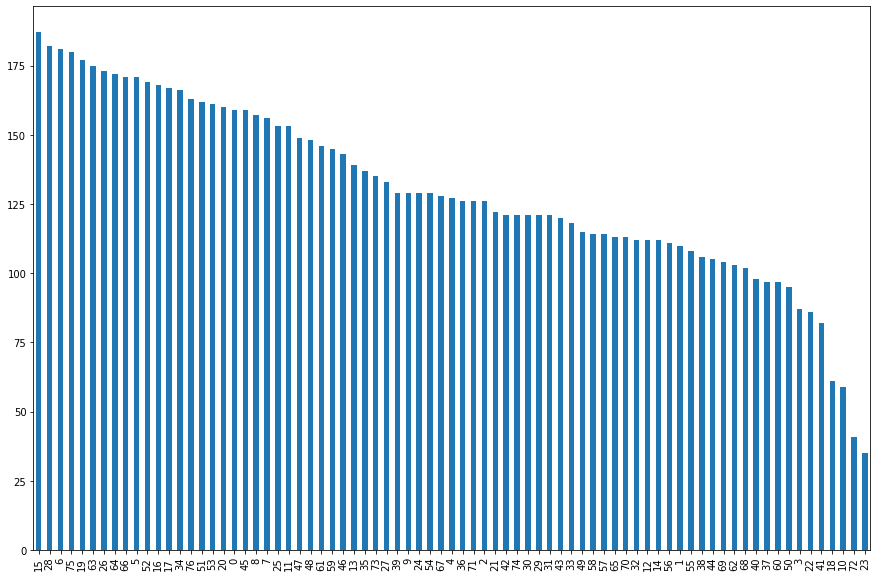

In [6]:
raw_dataset_train_df.label.value_counts().plot(kind='bar', figsize=(15, 10))

Here is the list of classes with their definition:

| label | intent (category)                                           |
|---:|:-------------------------------------------------|
|  0 | activate_my_card                                 |
|  1 | age_limit                                        |
|  2 | apple_pay_or_google_pay                          |
|  3 | atm_support                                      |
|  4 | automatic_top_up                                 |
|  5 | balance_not_updated_after_bank_transfer          |
|  6 | balance_not_updated_after_cheque_or_cash_deposit |
|  7 | beneficiary_not_allowed                          |
|  8 | cancel_transfer                                  |
|  9 | card_about_to_expire                             |
| 10 | card_acceptance                                  |
| 11 | card_arrival                                     |
| 12 | card_delivery_estimate                           |
| 13 | card_linking                                     |
| 14 | card_not_working                                 |
| 15 | card_payment_fee_charged                         |
| 16 | card_payment_not_recognised                      |
| 17 | card_payment_wrong_exchange_rate                 |
| 18 | card_swallowed                                   |
| 19 | cash_withdrawal_charge                           |
| 20 | cash_withdrawal_not_recognised                   |
| 21 | change_pin                                       |
| 22 | compromised_card                                 |
| 23 | contactless_not_working                          |
| 24 | country_support                                  |
| 25 | declined_card_payment                            |
| 26 | declined_cash_withdrawal                         |
| 27 | declined_transfer                                |
| 28 | direct_debit_payment_not_recognised              |
| 29 | disposable_card_limits                           |
| 30 | edit_personal_details                            |
| 31 | exchange_charge                                  |
| 32 | exchange_rate                                    |
| 33 | exchange_via_app                                 |
| 34 | extra_charge_on_statement                        |
| 35 | failed_transfer                                  |
| 36 | fiat_currency_support                            |
| 37 | get_disposable_virtual_card                      |
| 38 | get_physical_card                                |
| 39 | getting_spare_card                               |
| 40 | getting_virtual_card                             |
| 41 | lost_or_stolen_card                              |
| 42 | lost_or_stolen_phone                             |
| 43 | order_physical_card                              |
| 44 | passcode_forgotten                               |
| 45 | pending_card_payment                             |
| 46 | pending_cash_withdrawal                          |
| 47 | pending_top_up                                   |
| 48 | pending_transfer                                 |
| 49 | pin_blocked                                      |
| 50 | receiving_money                                  |
| 51 | Refund_not_showing_up                            |
| 52 | request_refund                                   |
| 53 | reverted_card_payment?                           |
| 54 | supported_cards_and_currencies                   |
| 55 | terminate_account                                |
| 56 | top_up_by_bank_transfer_charge                   |
| 57 | top_up_by_card_charge                            |
| 58 | top_up_by_cash_or_cheque                         |
| 59 | top_up_failed                                    |
| 60 | top_up_limits                                    |
| 61 | top_up_reverted                                  |
| 62 | topping_up_by_card                               |
| 63 | transaction_charged_twice                        |
| 64 | transfer_fee_charged                             |
| 65 | transfer_into_account                            |
| 66 | transfer_not_received_by_recipient               |
| 67 | transfer_timing                                  |
| 68 | unable_to_verify_identity                        |
| 69 | verify_my_identity                               |
| 70 | verify_source_of_funds                           |
| 71 | verify_top_up                                    |
| 72 | virtual_card_not_working                         |
| 73 | visa_or_mastercard                               |
| 74 | why_verify_identity                              |
| 75 | wrong_amount_of_cash_received                    |
| 76 | wrong_exchange_rate_for_cash_withdrawal          |

And this is a summary of the dataset

| Dataset statistics | Train | Test |
| --- | --- | --- |
| Number of examples | 10 003 | 3 080 |
| Average character length | 59.5 | 54.2 |
| Number of intents | 77 | 77 |

In [13]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)


def tokenize_function(example):
    return tokenizer(example["text"], truncation=True)


tokenized_datasets_train = raw_dataset_train.map(tokenize_function, batched=True)
tokenized_datasets_val = raw_dataset_val.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [8]:
from transformers import TrainingArguments

training_args = TrainingArguments("intent-banking", per_device_train_batch_size=16)

In [9]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=77) # watch out for the number of labels!

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets_train,
    eval_dataset=tokenized_datasets_val,
    data_collator=data_collator,
    tokenizer=tokenizer,
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [14]:
trainer.train()


  0%|          | 0/1878 [00:00<?, ?it/s]

Checkpoint destination directory test-trainer/checkpoint-500 already exists and is non-empty. Saving will proceed but saved results may be invalid.


{'loss': 1.4679, 'grad_norm': 9.389148712158203, 'learning_rate': 3.668796592119276e-05, 'epoch': 0.8}
{'loss': 0.4518, 'grad_norm': 7.393991947174072, 'learning_rate': 2.3375931842385517e-05, 'epoch': 1.6}
{'loss': 0.2117, 'grad_norm': 5.330203056335449, 'learning_rate': 1.0063897763578276e-05, 'epoch': 2.4}
{'train_runtime': 582.5736, 'train_samples_per_second': 51.511, 'train_steps_per_second': 3.224, 'train_loss': 0.5940346174473706, 'epoch': 3.0}


TrainOutput(global_step=1878, training_loss=0.5940346174473706, metrics={'train_runtime': 582.5736, 'train_samples_per_second': 51.511, 'train_steps_per_second': 3.224, 'train_loss': 0.5940346174473706, 'epoch': 3.0})

In [15]:
predictions = trainer.predict(tokenized_datasets_val)
print(predictions.predictions.shape, predictions.label_ids.shape)

  0%|          | 0/385 [00:00<?, ?it/s]

(3080, 77) (3080,)


In [16]:
predictions.predictions.argmax(axis=1)

array([41, 11, 11, ..., 24, 24, 24])

In [17]:
raw_dataset_val_df = raw_dataset_val.to_pandas()

In [18]:
raw_dataset_val_df['prediction'] = predictions.predictions.argmax(axis=1)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(raw_dataset_val_df['label'], raw_dataset_val_df['prediction']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        40
           2       1.00      1.00      1.00        40
           3       1.00      0.97      0.99        40
           4       0.95      0.93      0.94        40
           5       0.84      0.80      0.82        40
           6       1.00      0.93      0.96        40
           7       0.97      0.93      0.95        40
           8       1.00      0.95      0.97        40
           9       0.95      1.00      0.98        40
          10       0.93      0.93      0.93        40
          11       0.88      0.88      0.88        40
          12       0.90      0.88      0.89        40
          13       0.97      0.95      0.96        40
          14       0.87      0.97      0.92        40
          15       0.84      0.93      0.88        40
          16       0.90      0.95      0.93        40
          17       0.88    

We achieve around 93% accuracy and 93% F1-score... Not so bad for a classification problem with 77 classes!!

### Comparing to scikit-learn

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words="english")),
    ("classifier", LogisticRegression())
])

model.fit(raw_dataset_train['text'], raw_dataset_train['label'])

y_pred = model.predict(raw_dataset_val['text'])

print(classification_report(raw_dataset_val['label'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.93      0.97      0.95        40
           2       0.97      0.97      0.97        40
           3       0.90      0.93      0.91        40
           4       0.97      0.90      0.94        40
           5       0.64      0.75      0.69        40
           6       0.85      0.88      0.86        40
           7       0.89      0.82      0.86        40
           8       0.89      0.97      0.93        40
           9       1.00      0.97      0.99        40
          10       0.84      0.53      0.65        40
          11       0.75      0.90      0.82        40
          12       0.75      0.82      0.79        40
          13       0.86      0.93      0.89        40
          14       0.63      0.82      0.72        40
          15       0.78      0.90      0.84        40
          16       0.64      0.72      0.68        40
          17       0.90    